# Computer Vision

Images are large grids of color values. Techniques have been developed over many years with the intention of extracting information from images. This coding challenge explains one of the most common and most basic techniques, filtering via convolution.

### An Image
![Grid](https://www.dropbox.com/s/gkualdmkhsbx33s/image%20grid.png?raw=1)

## Iteration

Images are explored by iteration, a technique you should understand fairly well at this stage of your ML career. Iteration refers to progressing across a collection of data in an orderly fashion. Training an ML algorithm involves iterating over all of the data points in the training set and updating the model with each point.

Iterating on an image typically involves visiting each point in the image. Images have a height and a width, so there are two dimensions to iterate over, $x$ and $y$. The order of iteration is extremely important! Different results occur depending on if the image is iterated in a row-major fashion or a column-major fashion.

![Image iteration](https://www.lucidchart.com/publicSegments/view/e611d1b5-681c-4d5d-8565-1d1dc19f9ea0/image.png)

## Convolution

Many image processing techniques depend on this basic building block: convolution. Image convolution involves laying the filter "on top" of the image and computing the sum of the products of the overlapping values. The resulting value is stored in a new image. The filter (or mask) is moved by one pixel, and the process is repeated across the entire image.

$C_{i,j} = \sum_{F_{x,y}}{ I_{i-x,j-y}F_{x,y}}$

## Filtering

Convolution is always performed with a filter, mask, or kernel: typically a $k \times k$ matrix where $k$ is odd. This gives the filter an obvious center, which is used to compute the combination of the filter with the image at each coordinate of the image.

Filters include:
* [Gaussian](https://en.wikipedia.org/wiki/Kernel_(image_processing))
* [Hessian](https://en.wikipedia.org/wiki/Hessian_matrix)
* [Laplacian](https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm)
* [Difference of Gaussian](https://en.wikipedia.org/wiki/Difference_of_Gaussians)

## Rotation, Translation, and Scale Invariance

## Scale Space

A given image exists in a particular scale space - that is, the only data recorded in the image exists at each particular coordinate. Filters like those above produce interesting features only in the scale space of the original image - usually very small and uninformative to those observing the image. In order to detect features that are larger than single-pixel relationships, the image can be converted to a scale space image, or image pyramid.

![Scale Space Image](https://www.lucidchart.com/publicSegments/view/ce6e3ac3-7274-4440-b3c4-23ae5c68ba53/image.png)

Through convolution with a Gaussian kernel with $\sigma = 1/2$, followed by an image operation called subsampling, the image can be shrunk.

#### Subsampling

Create a new image where each pixel $p_{i,j} = f(I,i,j)$ where $f(I,i,j) = \frac{I_{2i,2j}+I_{2i+1,2j}+I_{i,2j}+I_{i,2j+1}}{4}$. This image is exactly 1/2 the size of the original image. Assuming the original image was previously smoothed by the appropriate Gaussian kernel, no information is lost. The new image is identical to the original image, presenting features $2x$ as large.


# Feature Vectors and Mapping

Finally, a set of regions discovered through a combination of the above techniques can be bagged or mapped into a group. Training algorithms then identify which groups of features belong to specific object classes, leading to the previous state of the art in image recognition systems.


## Assignment: 

Compute the convolution of the image provided in the CC with the following DoG Filter:


In [4]:
!pip install imageio

    100% |████████████████████████████████| 3.3MB 6.0MB/s 


In [0]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
from skimage import color

In [0]:
def convolution(image, kernel):
    output_height = image.shape[0]-kernel.shape[0]
    output_width = image.shape[1]-kernel.shape[1]
    output = np.zeros((output_height, output_width))
    
    for i in range(output_height):
        for j in range(output_width):
            img = image[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            conv = np.dot(img.flatten(), kernel.flatten())
            
            output[i, j] = conv
            
    return output

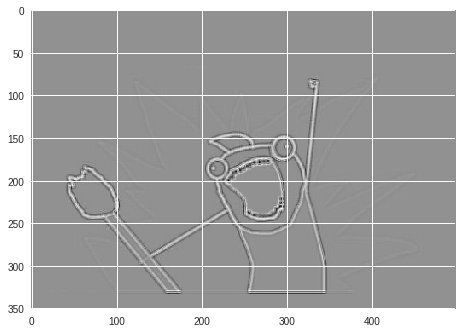

In [7]:
dog_filter = np.array([[1,1,1,1,1],[1,-3,-3,-3,1],[1,-3,8,-3,1],[1,-3,-3,-3,1],[1,1,1,1,1]])

# Display the image with matplotlib

I = imageio.imread('https://www.dropbox.com/s/dv3vtiqy439pzag/all_the_things.png?raw=1')
I_g = rescale_intensity(1-color.rgb2gray(I))

C = convolution(I_g, dog_filter)
plt.imshow(C);

# Stretch goal

* Compute the convolution of the above image and the dog_filter through all of the scale space levels that the dog_filter fits inside of

* Display the image pyramid with matplotlib